In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Load CSV files
df_data = pd.read_csv('pandas/df_data.csv', low_memory=False)
df_filtered = pd.read_csv('pandas/df_filtered.csv')

agg_df = pd.read_csv('pandas/agg_df_cluster1.csv')
fish_df = pd.read_csv('pandas/fish_df_cluster1.csv')

In [18]:
# designate which clustering to analyze
df_explore = agg_df # or agg_df_large
fish_explore = fish_df # or fish_df_large


Cluster sizes:
cluster
1     959
2     450
3     372
4     224
5      89
6      36
7      34
8      34
9      23
10     14
11     12
12     11
14      9
15      9
13      9
17      7
16      7
18      6
19      6
20      6
21      6
22      6
23      6
24      6
25      5
26      5
29      4
30      4
28      4
27      4
dtype: int64


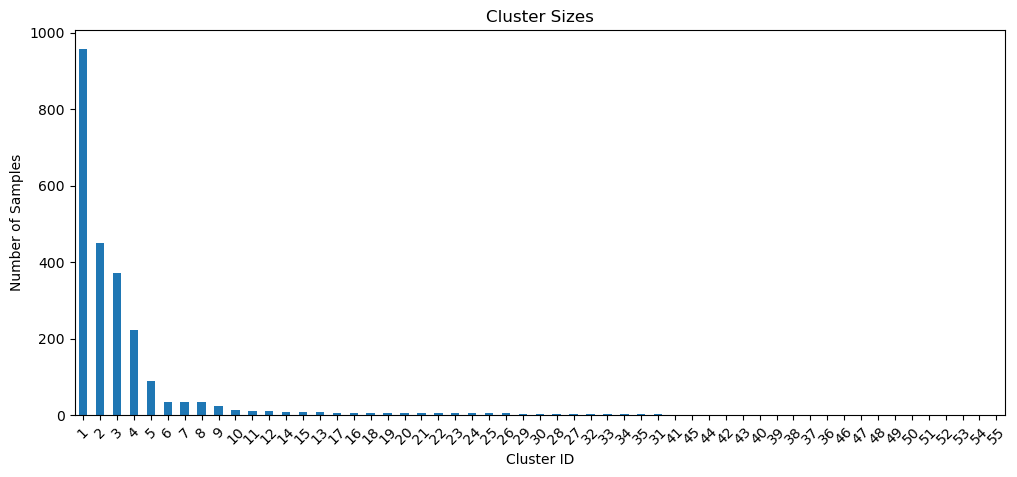

In [19]:
# Summary of clusters
cluster_summary = df_explore.groupby('cluster').size().sort_values(ascending=False)
print(f"\nCluster sizes:")
print(cluster_summary.head(30))

# Visualize cluster size distribution
plt.figure(figsize=(12, 5))
cluster_summary.plot(kind='bar')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Samples')
plt.title('Cluster Sizes')
plt.xticks(rotation=45);
#print(agg_df.groupby('cluster').size())

In [ ]:
# Specify cluster to analyze
cluster_num = 1

# Filter data for this cluster
cluster_data = df_explore[df_explore['cluster'] == cluster_num]
cluster_fish_data = df_filtered[df_filtered['barcode'].isin(cluster_data['barcode'])]

# Environmental variables summary (median)
env_vars = ['median_temp', 'median_depth', 'median_current', 'median_esveg92', 'median_cond']
env_summary = cluster_data[env_vars].median()

# Categorical variables summary (mode)
cat_vars = ['mode_substrt']
cat_summary = cluster_data[cat_vars].mode().iloc[0]

# Binary variables summary (proportion present)
binary_vars = ['snag_present', 'riprap_present', 'inout_present', 'flooded_present']
binary_summary = cluster_data[binary_vars].mean()

# Fish species counts
fish_in_cluster = fish_explore[df_explore['cluster'] == cluster_num].drop(columns=['cluster'])
species_counts = fish_in_cluster.sum().sort_values(ascending=False)
species_counts = species_counts[species_counts > 0]

cluster_barcodes = df_explore[df_explore['cluster'] == cluster_num]['barcode']

# Total individuals caught
fish_abundance = df_filtered[df_filtered['barcode'].isin(cluster_barcodes)].groupby('fishcode').size()
fish_length = cluster_fish_data.groupby('fishcode')['length'].mean()
#fish_weight = cluster_fish_data.groupby('fishcode')['weight'].mean()

# Number of samples where present
fish_occurrence = fish_in_cluster.sum()

# Combine
species_summary = pd.DataFrame({
    'total_caught': fish_abundance,
    'samples': fish_occurrence,
    'mean_length': round(fish_length,1),
#    'mean_weight': fish_weight
}).fillna(0).astype({'total_caught': int, 'samples': int})
species_summary = species_summary[species_summary['samples'] > 0].sort_values('samples', ascending=False)

# Print summary
print(f"=== CLUSTER {cluster_num} SUMMARY ===")
print(f"\nTotal samples (identified by barcode): {len(cluster_data)}")
print("\n--- Environmental Variables (Median) ---")
print(env_summary)
print("\n--- Categorical Variables (Mode) ---")
print(cat_summary)
print("\n--- Binary Variables (Proportion Present) ---")
print(binary_summary)
print(f"\n--- Fish Species (Count of {len(cluster_data)} samples) ---")
print(species_summary)

In [ ]:
# Summarize all clusters at once
for cluster_num in sorted(df_explore['cluster'].unique()):
    cluster_data = df_explore[df_explore['cluster'] == cluster_num]
    cluster_fish_data = df_data[df_data['barcode'].isin(cluster_data['barcode'])]
    
    # Environmental variables summary (median)
    env_vars = ['median_temp', 'median_depth', 'median_current', 'median_esveg92', 'median_cond']
    env_summary = cluster_data[env_vars].median()

    # Categorical variables summary (mode)
    cat_vars = ['mode_substrt']
    cat_summary = cluster_data[cat_vars].mode().iloc[0]

    # Binary variables summary (proportion present)
    binary_vars = ['snag_present', 'riprap_present', 'inout_present', 'flooded_present']
    binary_summary = cluster_data[binary_vars].mean()

    # Fish species counts
    fish_in_cluster = fish_explore[df_explore['cluster'] == cluster_num].drop(columns=['cluster'])
    species_counts = fish_in_cluster.sum().sort_values(ascending=False)
    species_counts = species_counts[species_counts > 0]

    cluster_barcodes = df_explore[df_explore['cluster'] == cluster_num]['barcode']

    # Total individuals caught
    fish_abundance = df_filtered[df_filtered['barcode'].isin(cluster_barcodes)].groupby('fishcode').size()
    fish_length = cluster_fish_data.groupby('fishcode')['length'].mean()
    #fish_weight = cluster_fish_data.groupby('fishcode')['weight'].mean()

    # Number of samples where present
    fish_occurrence = fish_in_cluster.sum()

    # Combine
    species_summary = pd.DataFrame({
        'total_caught': fish_abundance,
        'samples': fish_occurrence,
        'mean_length': round(fish_length,1),
#    'mean_weight': fish_weight
    }).fillna(0).astype({'total_caught': int, 'samples': int})
    species_summary = species_summary[species_summary['samples'] > 0].sort_values('samples', ascending=False)


    # Print summary
    print(f"=== CLUSTER {cluster_num} SUMMARY ===")
    print(f"\nTotal samples (identified by barcode): {len(cluster_data)}")
    print("\n--- Environmental Variables (Median) ---")
    print(env_summary)
    print("\n--- Categorical Variables (Mode) ---")
    print(cat_summary)
    print("\n--- Binary Variables (Proportion Present) ---")
    print(binary_summary)
    print(f"\n--- Fish Species (Count of {len(cluster_data)} samples) ---")
    print(species_summary)

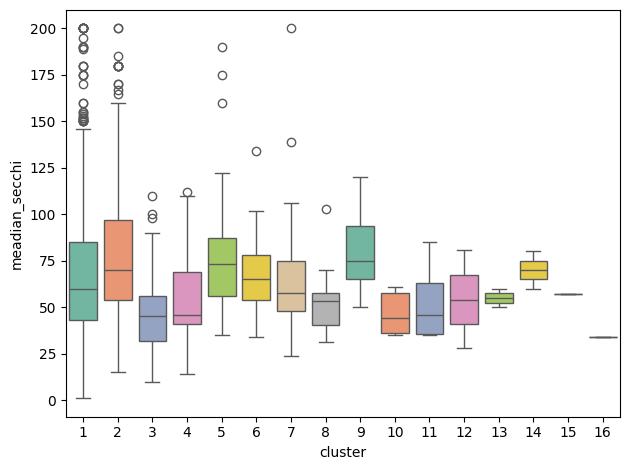

In [7]:
sns.boxplot(x='cluster', y='meadian_secchi', hue='cluster', data=df_explore, palette='Set2', legend=False)
plt.tight_layout()
plt.show()

In [20]:
df_explore.head()

,barcode,year,utm_e,utm_n,mode_aqua_desc,median_temp,median_depth,median_current,median_do,median_secchi,...,BHMW,STSN,WTBS,SHCB,RESF,LKSG,PRPH,LSSR,GSPK,cluster
0,11000330,1993,578229.0,4915808.0,Contiguous Floodplain Lake,14.5,0.6,0.09,NaN,65.0,...,False,False,False,False,False,False,False,False,False,2
1,11000331,1993,579229.0,4916258.0,Contiguous Floodplain Lake,12.6,0.6,0.06,NaN,60.0,...,False,True,True,False,False,False,False,False,False,1
2,11000332,1993,580230.0,4915408.0,Contiguous Floodplain Lake,12.4,1.3,0.06,NaN,60.0,...,False,False,False,False,False,False,False,False,False,9
3,11000333,1993,580880.0,4914858.0,Contiguous Floodplain Lake,12.0,0.9,NaN,NaN,72.0,...,False,False,False,False,False,False,False,False,False,43
4,11000334,1993,581880.0,4913658.0,Contiguous Floodplain Lake,12.0,0.9,0.00,NaN,72.0,...,False,False,False,False,False,False,False,False,False,2


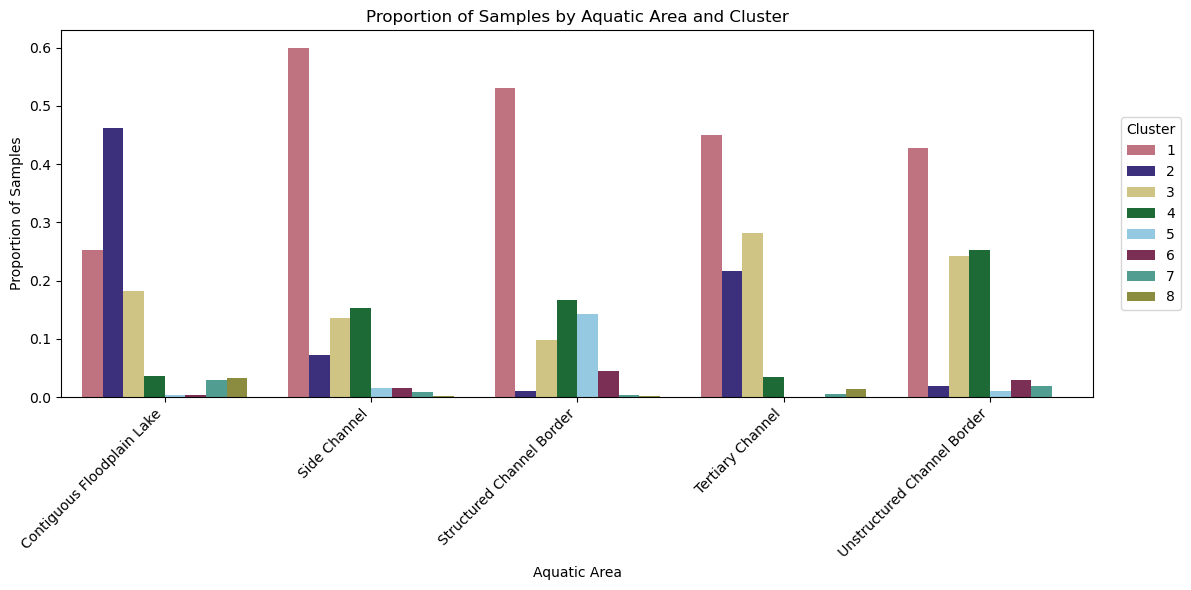

In [37]:
import tol_colors as tc

# Define clusters to show
highlight_clusters = [1, 2, 3, 4, 5, 6, 7, 8]

# Filter data to highlight clusters only
df_plot = df_explore[df_explore['cluster'].isin(highlight_clusters)].copy()

# Calculate proportion of samples in each cluster for each aqua_desc
prop_df = (df_plot.groupby(['mode_aqua_desc', 'cluster'])
           .size()
           .reset_index(name='count'))

# Calculate total samples per aqua_desc to get proportions
totals = prop_df.groupby('mode_aqua_desc')['count'].transform('sum')
prop_df['proportion'] = prop_df['count'] / totals

# Set cluster as categorical with numerical order
prop_df['cluster'] = pd.Categorical(prop_df['cluster'], categories=highlight_clusters, ordered=True)

# Build color palette from tol_colors muted
CB_PALETTE = tc.muted
cluster_colors = {c: CB_PALETTE[i % len(CB_PALETTE)] for i, c in enumerate(highlight_clusters)}

# Create plot
plt.figure(figsize=(12, 6))
sns.barplot(data=prop_df, x='mode_aqua_desc', y='proportion', hue='cluster',
            palette=cluster_colors, dodge=True, 
            order=sorted(prop_df['mode_aqua_desc'].unique()),
            hue_order=highlight_clusters)

plt.xlabel('Aquatic Area')
plt.ylabel('Proportion of Samples')
plt.title('Proportion of Samples by Aquatic Area and Cluster')
plt.legend(title='Cluster', bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(
    'cluster_aqua_area_proportion.jpg',
    dpi=300,
    bbox_inches='tight',
    format='jpeg',
    pil_kwargs={'quality': 95, 'optimize': True, 'progressive': True}
)

plt.show()

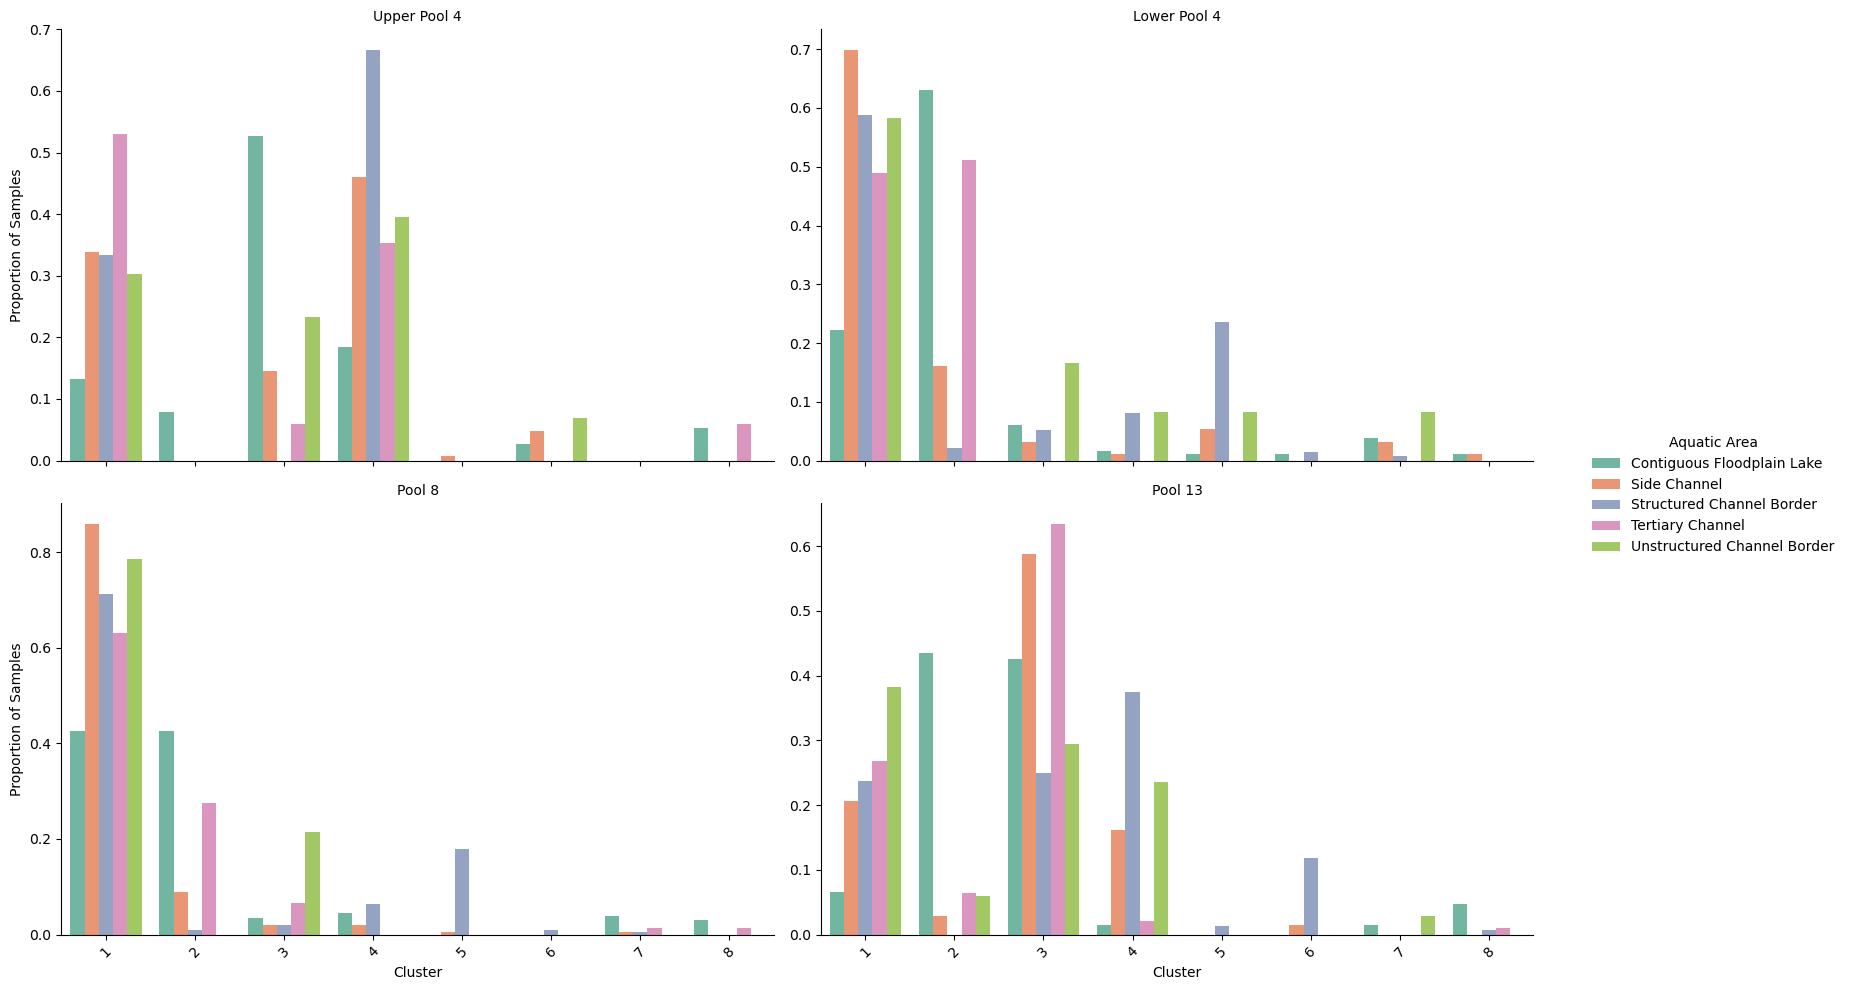

In [23]:
highlight_clusters = [1, 2, 3, 4, 5, 6, 7, 8]

pool_order = ["Upper Pool 4", "Lower Pool 4", "Pool 8", "Pool 13"]

# Filter data to only include pools in pool_order and clusters 1-8
df_plot = df_explore[(df_explore['mode_pool'].isin(pool_order)) & 
                      (df_explore['cluster'].isin(highlight_clusters))].copy()

# Calculate proportion of samples in each cluster for each pool and aqua_desc combination
prop_df = (df_plot.groupby(['mode_pool', 'mode_aqua_desc', 'cluster'])
           .size()
           .reset_index(name='count'))

# Calculate total samples per pool and aqua_desc to get proportions
totals = prop_df.groupby(['mode_pool', 'mode_aqua_desc'])['count'].transform('sum')
prop_df['proportion'] = prop_df['count'] / totals

# Set pool as categorical with specified order
prop_df['mode_pool'] = pd.Categorical(prop_df['mode_pool'], categories=pool_order, ordered=True)

# Set cluster as categorical with numerical order
prop_df['cluster'] = pd.Categorical(prop_df['cluster'], categories=highlight_clusters, ordered=True)

# Create FacetGrid
g = sns.FacetGrid(prop_df, col='mode_pool', col_wrap=2, 
                  height=5, aspect=1.3, sharey=False)

# Plot bars for each facet
g.map_dataframe(sns.barplot, x='cluster', y='proportion', hue='mode_aqua_desc', 
                palette='Set2', dodge=True, order=highlight_clusters)

# Customize
g.set_axis_labels('Cluster', 'Proportion of Samples')
g.set_titles(col_template='{col_name}')
g.add_legend(title='Aquatic Area', bbox_to_anchor=(1.02, 0.5), loc='center left')

# Rotate x-axis labels if needed
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

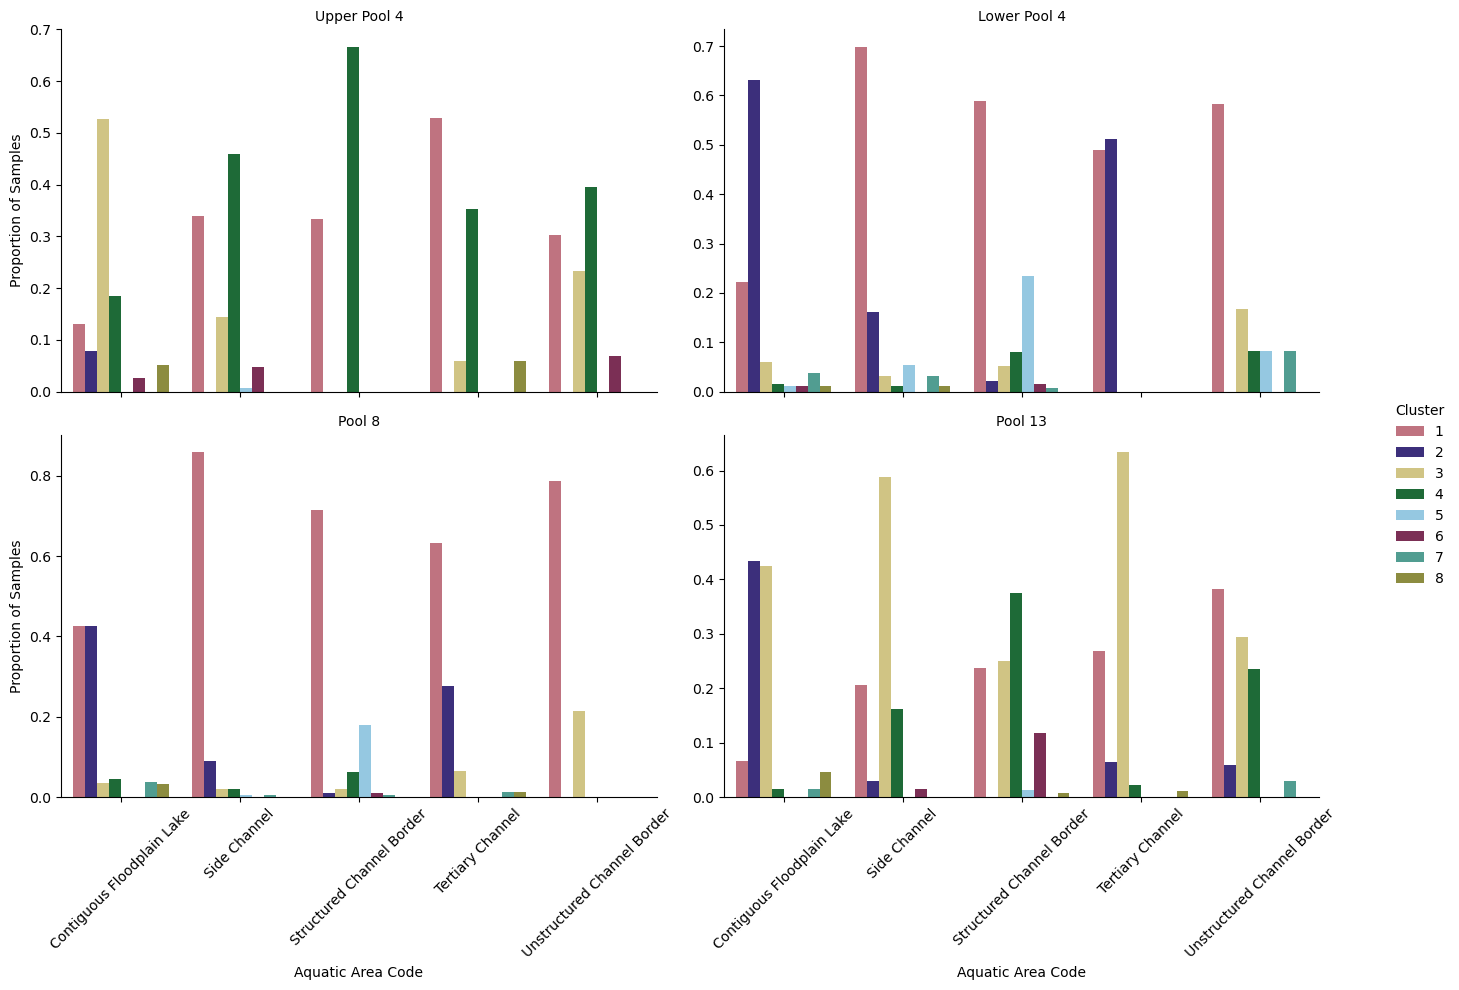

In [29]:
import tol_colors as tc

# Define clusters to show and pool order
highlight_clusters = [1, 2, 3, 4, 5, 6, 7, 8]
pool_order = ["Upper Pool 4", "Lower Pool 4", "Pool 8", "Pool 13"]

# Filter data to only include pools in pool_order and highlight clusters
df_plot = df_explore[(df_explore['mode_pool'].isin(pool_order)) & 
                      (df_explore['cluster'].isin(highlight_clusters))].copy()

# Calculate proportion of samples in each cluster for each pool and aqua_code combination
prop_df = (df_plot.groupby(['mode_pool', 'mode_aqua_desc', 'cluster'])
           .size()
           .reset_index(name='count'))

# Calculate total samples per pool and aqua_code to get proportions
totals = prop_df.groupby(['mode_pool', 'mode_aqua_desc'])['count'].transform('sum')
prop_df['proportion'] = prop_df['count'] / totals

# Set pool as categorical with specified order
prop_df['mode_pool'] = pd.Categorical(prop_df['mode_pool'], categories=pool_order, ordered=True)

# Set cluster as categorical with numerical order
prop_df['cluster'] = pd.Categorical(prop_df['cluster'], categories=highlight_clusters, ordered=True)

# Build color palette from tol_colors muted
CB_PALETTE = tc.muted
cluster_colors = {c: CB_PALETTE[i % len(CB_PALETTE)] for i, c in enumerate(highlight_clusters)}

# Create FacetGrid
g = sns.FacetGrid(prop_df, col='mode_pool', col_wrap=2, 
                  height=5, aspect=1.3, sharey=False)

# Plot bars for each facet
g.map_dataframe(sns.barplot, x='mode_aqua_desc', y='proportion', hue='cluster', 
                palette=cluster_colors, dodge=True, order=sorted(prop_df['mode_aqua_desc'].unique()),
                hue_order=highlight_clusters)

# Customize
g.set_axis_labels('Aquatic Area Code', 'Proportion of Samples')
g.set_titles(col_template='{col_name}')
g.add_legend(title='Cluster', bbox_to_anchor=(1.02, 0.5), loc='center left')

# Rotate x-axis labels if needed
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

/var/folders/4d/6pl9k4d15bd44r543fkh_pl0jmttd6/T/ipykernel_79683/608902748.py:22: DeprecationWarning: tol_cset is soft-deprecated since 2.0, please use tol_colors.colorsets instead
  CB_PALETTE = list(tc.tol_cset('muted'))


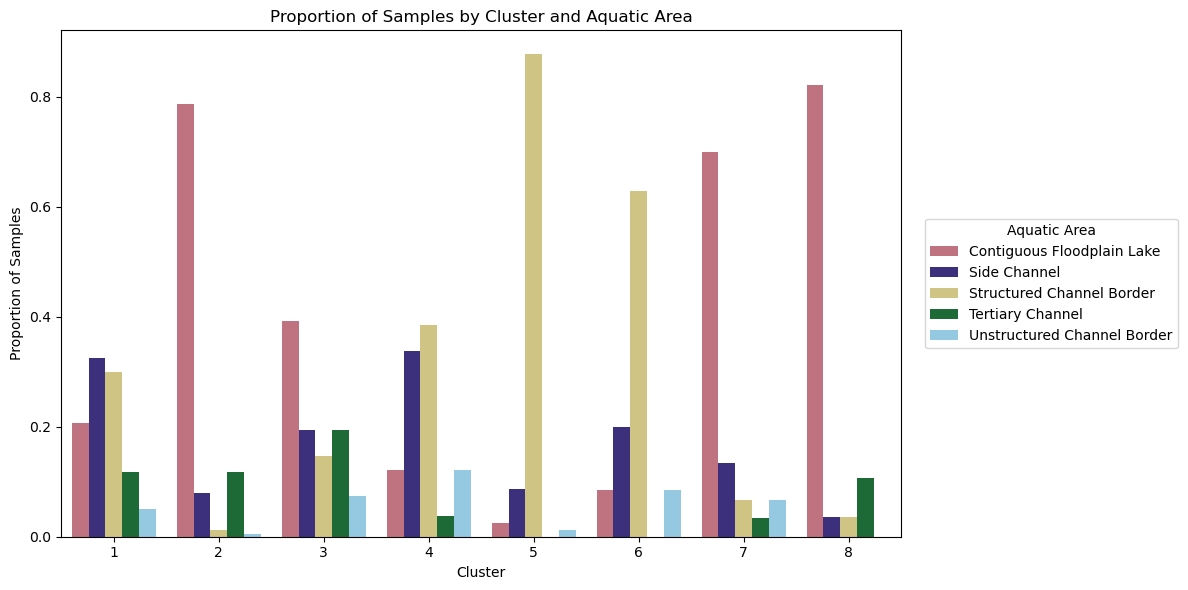

In [31]:
import tol_colors as tc

# Define clusters to show
highlight_clusters = [1, 2, 3, 4, 5, 6, 7, 8]

# Filter data to highlight clusters only
df_plot = df_explore[df_explore['cluster'].isin(highlight_clusters)].copy()

# Calculate proportion of samples in each cluster for each aqua_desc
prop_df = (df_plot.groupby(['mode_aqua_desc', 'cluster'])
           .size()
           .reset_index(name='count'))

# Calculate total samples per cluster to get proportions
totals = prop_df.groupby('cluster')['count'].transform('sum')
prop_df['proportion'] = prop_df['count'] / totals

# Set cluster as categorical with numerical order
prop_df['cluster'] = pd.Categorical(prop_df['cluster'], categories=highlight_clusters, ordered=True)

# Build color palette from tol_colors muted for aquatic areas
CB_PALETTE = list(tc.tol_cset('muted'))
aqua_areas = sorted(prop_df['mode_aqua_desc'].unique())
aqua_colors = {area: CB_PALETTE[i % len(CB_PALETTE)] for i, area in enumerate(aqua_areas)}

# Create plot
plt.figure(figsize=(12, 6))
sns.barplot(data=prop_df, x='cluster', y='proportion', hue='mode_aqua_desc',
            palette=aqua_colors, dodge=True, 
            order=highlight_clusters,
            hue_order=aqua_areas)

plt.xlabel('Cluster')
plt.ylabel('Proportion of Samples')
plt.title('Proportion of Samples by Cluster and Aquatic Area')
plt.legend(title='Aquatic Area', bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.tight_layout()
plt.show()